**ADY Project – Uploading Data** 

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_excel("C:/Users/99470/Desktop/19.07.2023 - Texniki tapşırıq.xlsx",2)
df = data.copy()

**Data Cleaning** 

In [3]:
#replacing whitespaces with "_" in column names for easy use 
df.columns=df.columns.str.replace(' ','_')
df.head()

,ay,Yük_qrupu,Yük_adı,Vaqon_növü,Daşınma_rejim,Ton,year,Göndərən_ölkə,Təyinat_ölkə,Təyinat_stansiyası,Göndərən_stansiya,İstiqamət,Ekspeditorun_adı,Sifarişçinin_adı
0,1.0,"Təzə meyvə,giləmeyvə və tərəvəz.Fındıq",Лук-порей и луковичные овощи свежие,Digər,Daxili,490.0,2014,Azərbaycan,Azərbaycan,ГАДЖИ ЗЕЙНАЛАБДИН,БАКУ-ТОВАРНАЯ,Şimal,"""TRANS KAFKAZ TRANSPORT"" MMC","""AZ TRANS RAIL"" MƏHDUD MƏSULIYYƏTLI CƏMIYYƏTI"
1,2.0,"Təzə meyvə,giləmeyvə və tərəvəz.Fındıq",Лук-порей и луковичные овощи свежие,Digər,Daxili,410.0,2014,Azərbaycan,Azərbaycan,ГАДЖИ ЗЕЙНАЛАБДИН,БАКУ-ТОВАРНАЯ,Şimal,"""TRANS KAFKAZ TRANSPORT"" MMC","""TRANS KAFKAZ TRANSPORT"" MMC"
2,3.0,"Təzə meyvə,giləmeyvə və tərəvəz.Fındıq","Овощи свежие, к.п.о.",Yarımvaqon,Daxili,30.0,2014,Azərbaycan,Azərbaycan,БАЛАДЖАРЫ,КАЗИ-МАГОМЕД,Şimal,"""TRANS KAFKAZ TRANSPORT"" MMC","""TRANS KAFKAZ TRANSPORT"" MMC"
3,4.0,"Təzə meyvə,giləmeyvə və tərəvəz.Fındıq","Овощи свежие, к.п.о.",Yarımvaqon,Daxili,80.0,2014,Azərbaycan,Azərbaycan,ПИРШАГИ,КАЗИ-МАГОМЕД,Şimal,"""TRANS KAFKAZ TRANSPORT"" MMC","""TRANS KAFKAZ TRANSPORT"" MMC"
4,5.0,"Təzə meyvə, giləmeyvə və tərəvəz. Fındıq","Картофель свежий, к.п.о.",Digər,idxal,530.0,2014,Belarus,Azərbaycan,ЭЙБАТ,ЯЛАМА,Şimal,""" A Z T R A N S O I L "" MƏHDUD MƏSULIYYƏTLI CƏ...","""AZ TRANS RAIL"" MƏHDUD MƏSULIYYƏTLI CƏMIYYƏTI"


In [4]:
df.columns

Index(['ay', 'Yük_qrupu', 'Yük_adı', 'Vaqon_növü', 'Daşınma_rejim', 'Ton',
       'year', 'Göndərən_ölkə', 'Təyinat_ölkə', 'Təyinat_stansiyası',
       'Göndərən_stansiya', 'İstiqamət', 'Ekspeditorun_adı',
       'Sifarişçinin_adı'],
      dtype='object')

In [5]:
df.shape

(500, 14)

In [6]:
df.describe()

,ay,Ton,year
count,500.00000,500.000000,500.0
mean,6.45360,419.020840,2014.0
std,3.45778,173.029519,0.0
min,0.80000,0.420000,2014.0
25%,3.00000,350.000000,2014.0
50%,6.00000,420.000000,2014.0
75%,9.00000,500.000000,2014.0
max,12.00000,900.000000,2014.0


In [7]:
df.count()

ay                    500
Yük_qrupu             457
Yük_adı               500
Vaqon_növü            496
Daşınma_rejim         471
Ton                   500
year                  500
Göndərən_ölkə         500
Təyinat_ölkə          500
Təyinat_stansiyası    498
Göndərən_stansiya     494
İstiqamət             500
Ekspeditorun_adı      500
Sifarişçinin_adı      500
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ay                  500 non-null    float64
 1   Yük_qrupu           457 non-null    object 
 2   Yük_adı             500 non-null    object 
 3   Vaqon_növü          496 non-null    object 
 4   Daşınma_rejim       471 non-null    object 
 5   Ton                 500 non-null    float64
 6   year                500 non-null    int64  
 7   Göndərən_ölkə       500 non-null    object 
 8   Təyinat_ölkə        500 non-null    object 
 9   Təyinat_stansiyası  498 non-null    object 
 10  Göndərən_stansiya   494 non-null    object 
 11  İstiqamət           500 non-null    object 
 12  Ekspeditorun_adı    500 non-null    object 
 13  Sifarişçinin_adı    500 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 54.8+ KB


In [9]:
#correcting data types
df["ay"] = df["ay"].astype("int64")
df["Ton"] = df["Ton"].astype("int64")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ay                  500 non-null    int64 
 1   Yük_qrupu           457 non-null    object
 2   Yük_adı             500 non-null    object
 3   Vaqon_növü          496 non-null    object
 4   Daşınma_rejim       471 non-null    object
 5   Ton                 500 non-null    int64 
 6   year                500 non-null    int64 
 7   Göndərən_ölkə       500 non-null    object
 8   Təyinat_ölkə        500 non-null    object
 9   Təyinat_stansiyası  498 non-null    object
 10  Göndərən_stansiya   494 non-null    object
 11  İstiqamət           500 non-null    object
 12  Ekspeditorun_adı    500 non-null    object
 13  Sifarişçinin_adı    500 non-null    object
dtypes: int64(3), object(11)
memory usage: 54.8+ KB


In [11]:
#as some values are written twice with different names, I have to change and correct them
df["Daşınma_rejim"].value_counts()

Tranzit    225
ıdxal      214
idxal       21
Ixrac        7
Daxili       4
Name: Daşınma_rejim, dtype: int64

In [12]:
df["Daşınma_rejim"].replace("ıdxal", "idxal", inplace=True)
df["Daşınma_rejim"].value_counts()

idxal      235
Tranzit    225
Ixrac        7
Daxili       4
Name: Daşınma_rejim, dtype: int64

In [13]:
df["Yük_qrupu"].value_counts()

Təzə meyvə,giləmeyvə və tərəvəz.Fındıq      211
Qida sənayesi məhsulları                    186
Taxıl və dənli bitkilər                      37
Təzə meyvə, giləmeyvə və tərəvəz. Fındıq     18
Kimya  sənayesi məhsulları                    5
Name: Yük_qrupu, dtype: int64

In [14]:
df["Yük_qrupu"].replace("Təzə meyvə,giləmeyvə və tərəvəz.Fındıq", "Təzə meyvə, giləmeyvə və tərəvəz. Fındıq", inplace=True)
df["Yük_qrupu"].value_counts()

Təzə meyvə, giləmeyvə və tərəvəz. Fındıq    229
Qida sənayesi məhsulları                    186
Taxıl və dənli bitkilər                      37
Kimya  sənayesi məhsulları                    5
Name: Yük_qrupu, dtype: int64

In [15]:
df["Yük_adı"].value_counts()

Баранина свежая, края хребтовые спинной и почечной частей, необваленные                                                 193
Лук-порей и луковичные овощи свежие                                                                                      98
Картофель свежий, к.п.о.                                                                                                 63
Горох сушеный                                                                                                            42
Овощи свежие, к.п.о.                                                                                                     41
Грибы рода Agaricus сушеные, не обработанные                                                                             14
Вишня кислая свежая                                                                                                      14
Фрукты, ягоды свежие, к.п.о.                                                                                             11
Ананасы 

In [16]:
df["Vaqon_növü"].value_counts()

Konteyner     190
Qapalı        130
Digər         104
İzotermik      31
Kanteynr       13
Yarımvaqon     11
Platforma       9
Platforma$      5
Çən             3
Name: Vaqon_növü, dtype: int64

In [17]:
df["Vaqon_növü"].replace("Platforma$", "Platforma", inplace=True)
df["Vaqon_növü"].replace("Kanteynr", "Konteyner", inplace=True)
df["Vaqon_növü"].value_counts()

Konteyner     203
Qapalı        130
Digər         104
İzotermik      31
Platforma      14
Yarımvaqon     11
Çən             3
Name: Vaqon_növü, dtype: int64

In [18]:
df["year"].value_counts()

2014    500
Name: year, dtype: int64

In [19]:
df.drop("year", axis=1, inplace=True)

In [20]:
df["ay"].value_counts()

1     42
2     42
3     42
4     42
5     42
6     42
7     42
8     41
9     41
10    41
11    41
12    41
0      1
Name: ay, dtype: int64

In [21]:
df["ay"] = df["ay"].replace(0,8)
df["ay"].value_counts()

1     42
2     42
3     42
4     42
5     42
6     42
7     42
8     42
9     41
10    41
11    41
12    41
Name: ay, dtype: int64

In [22]:
df["Ton"].value_counts()

420    116
680     40
500     37
430     25
470     22
      ... 
570      1
610      1
130      1
150      1
900      1
Name: Ton, Length: 65, dtype: int64

In [23]:
df["Göndərən_ölkə"].value_counts()

ABŞ              132
Rusiya            82
Kanada            55
Qazaxıstan        44
№3-cü ölkələr     43
Litva             31
Ukrayna           23
Gürcüstan         17
Azərbaycan        13
Braziliya         12
Türkiyə            9
Latviya            9
Çin                8
Belarus            5
Özbəkistan         4
Polşa              3
Ərəb Əmirliyi      3
Niderland          2
Rus                1
Tailand            1
Qırğızıstan        1
Bolqarıstan        1
Cənubi Koreya      1
Name: Göndərən_ölkə, dtype: int64

In [24]:
df["Göndərən_ölkə"].replace("Rus", "Rusiya", inplace=True)
df["Göndərən_ölkə"].value_counts()

ABŞ              132
Rusiya            83
Kanada            55
Qazaxıstan        44
№3-cü ölkələr     43
Litva             31
Ukrayna           23
Gürcüstan         17
Azərbaycan        13
Braziliya         12
Türkiyə            9
Latviya            9
Çin                8
Belarus            5
Özbəkistan         4
Polşa              3
Ərəb Əmirliyi      3
Niderland          2
Tailand            1
Qırğızıstan        1
Bolqarıstan        1
Cənubi Koreya      1
Name: Göndərən_ölkə, dtype: int64

In [25]:
df["Təyinat_ölkə"].value_counts()

Azərbaycan       251
Türkmənistan      96
Tacikistan        71
Qazaxıstan        50
Gürcüstan         16
Özbəkistan         7
Rusiya             6
№3-cü ölkələr      2
Əfqanistan         1
Name: Təyinat_ölkə, dtype: int64

In [26]:
df["Təyinat_stansiyası"].value_counts()

БАКУ-ТОРГОВАЯ         225
ЭЙБАТ                  86
КИШЛЫ                  57
ГАДЖИ ЗЕЙНАЛАБДИН      52
БАЛАДЖАРЫ              19
ХЫРДАЛАН               19
БЕЮК-КЯСИК-ЭКСПОРТ     18
ЯЛАМА                  12
ПИРШАГИ                 3
ХАЧМАС                  3
МАСАЛЛЫ                 2
МАШТАГИ                 1
СУМГАИТ                 1
Name: Təyinat_stansiyası, dtype: int64

In [27]:
df["Göndərən_stansiya"].value_counts()

БЕЮК-КЯСИК-ЭКСПОРТ    280
ЯЛАМА                 166
БАКУ-ТОВАРНАЯ          39
КИШЛЫ                   3
СУМГАИТ                 3
КАЗИ-МАГОМЕД            2
МУГАН                   1
Name: Göndərən_stansiya, dtype: int64

In [28]:
df["İstiqamət"].value_counts()

Şimal    481
Qərb      17
Cənub      2
Name: İstiqamət, dtype: int64

In [29]:
df["Ekspeditorun_adı"].value_counts()

" A Z T R A N S O I L " MƏHDUD MƏSULIYYƏTLI CƏMIYY    325
"TRANS KAFKAZ TRANSPORT" MMC                          119
" A Z T R A N O I L " MƏHDUD MƏSULIYYƏTLI CƏMIYY       27
Aztranoil MMC                                          16
MARKETINQ VƏ IQTISADI ƏMƏLIYYATLAR IDARƏSI              6
Marketinq və iqtisadi əməliyyatlar idarəsi              4
24 N-li RELS QAYNAQLAMA QATARI                          2
24 RELS QAYNAQLAMA QATARI                               1
Name: Ekspeditorun_adı, dtype: int64

In [30]:
df["Ekspeditorun_adı"].replace("\" A Z T R A N O I L \" MƏHDUD MƏSULIYYƏTLI CƏMIYY", "\"AZTRANSOIL\" MMC", inplace=True)
df["Ekspeditorun_adı"].replace("\" A Z T R A N O I L \" MƏHDUD MƏSULIYYƏTLI CƏMIYY", "\"AZTRANSOIL\" MMC", inplace=True)
df["Ekspeditorun_adı"].replace("MARKETINQ VƏ IQTISADI ƏMƏLIYYATLAR IDARƏSI", "Marketinq və iqtisadi əməliyyatlar idarəsi", inplace=True)
df["Ekspeditorun_adı"].replace("24 RELS QAYNAQLAMA QATARI", "24 N-li RELS QAYNAQLAMA QATARI", inplace=True)
df["Ekspeditorun_adı"].value_counts()

" A Z T R A N S O I L " MƏHDUD MƏSULIYYƏTLI CƏMIYY    325
"TRANS KAFKAZ TRANSPORT" MMC                          119
"AZTRANSOIL" MMC                                       27
Aztranoil MMC                                          16
Marketinq və iqtisadi əməliyyatlar idarəsi             10
24 N-li RELS QAYNAQLAMA QATARI                          3
Name: Ekspeditorun_adı, dtype: int64

In [31]:
df["Sifarişçinin_adı"].value_counts()

"AZ TRANS RAIL" MƏHDUD MƏSULIYYƏTLI CƏMIYYƏTI         213
"AZƏRBAYCAN ŞƏKƏR ISTEHSALAT BIRLIYI" MMC             134
"TRANS KAFKAZ TRANSPORT" MMC                           58
"AZƏRBAYCAN ŞƏKƏR ISTEHSALAT BIRLIYI" M.M.C.           26
Marketinq və iqtisadi əməliyyatlar idarəsi             24
MARKETINQ VƏ IQTISADI ƏMƏLIYYATLAR IDARƏSI             23
" A Z T R A N S O I L " MƏHDUD MƏSULIYYƏTLI CƏMIYY      5
"EURO-ASIAN OIL COMPANY INC."                           4
"O R B I T A" MMC                                       4
"AZƏRNEFTYAĞ" NEFT EMALI ZAVODU                         3
"O R B I T A" MƏHDUD MƏSULIYYƏTLI CƏMIYYƏTI             3
AZƏRNEFTYAĞ                                             3
Name: Sifarişçinin_adı, dtype: int64

In [32]:
df["Sifarişçinin_adı"].replace("\"AZƏRBAYCAN ŞƏKƏR ISTEHSALAT BIRLIYI\" M.M.C.", "\"AZƏRBAYCAN ŞƏKƏR ISTEHSALAT BIRLIYI\" MMC", inplace=True)
df["Sifarişçinin_adı"].replace("MARKETINQ VƏ IQTISADI ƏMƏLIYYATLAR IDARƏSI", "Marketinq və iqtisadi əməliyyatlar idarəsi", inplace=True)
df["Sifarişçinin_adı"].replace("\"O R B I T A\" MMC", "ORBITA MMC", inplace=True)
df["Sifarişçinin_adı"].replace("\"O R B I T A\" MƏHDUD MƏSULIYYƏTLI CƏMIYYƏTI", "ORBITA MMC", inplace=True)
df["Sifarişçinin_adı"].replace("AZƏRNEFTYAĞ", "\"AZƏRNEFTYAĞ\" NEFT EMALI ZAVODU", inplace=True)
df["Sifarişçinin_adı"].value_counts()

"AZ TRANS RAIL" MƏHDUD MƏSULIYYƏTLI CƏMIYYƏTI         213
"AZƏRBAYCAN ŞƏKƏR ISTEHSALAT BIRLIYI" MMC             160
"TRANS KAFKAZ TRANSPORT" MMC                           58
Marketinq və iqtisadi əməliyyatlar idarəsi             47
ORBITA MMC                                              7
"AZƏRNEFTYAĞ" NEFT EMALI ZAVODU                         6
" A Z T R A N S O I L " MƏHDUD MƏSULIYYƏTLI CƏMIYY      5
"EURO-ASIAN OIL COMPANY INC."                           4
Name: Sifarişçinin_adı, dtype: int64

**Checking and Filling Missing Values**

In [33]:
df.isnull().sum()

ay                     0
Yük_qrupu             43
Yük_adı                0
Vaqon_növü             4
Daşınma_rejim         29
Ton                    0
Göndərən_ölkə          0
Təyinat_ölkə           0
Təyinat_stansiyası     2
Göndərən_stansiya      6
İstiqamət              0
Ekspeditorun_adı       0
Sifarişçinin_adı       0
dtype: int64

<AxesSubplot:>

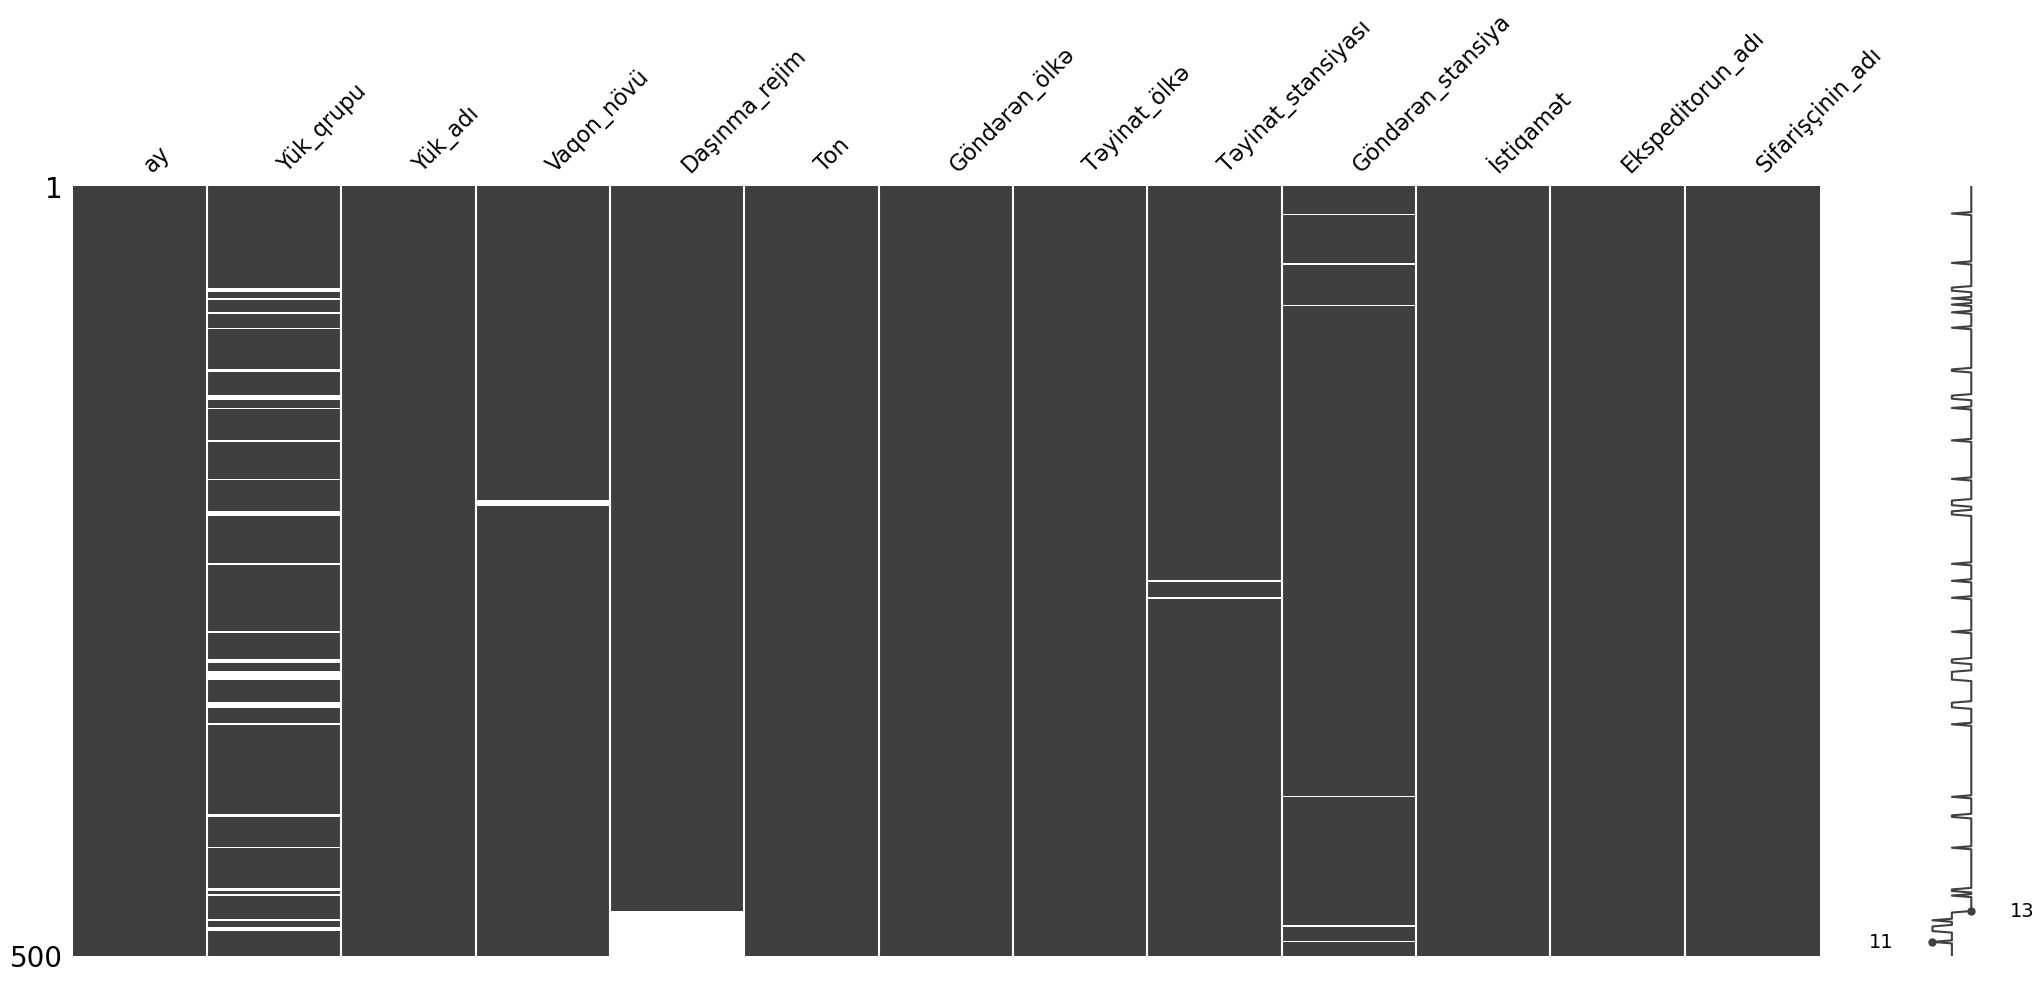

In [34]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

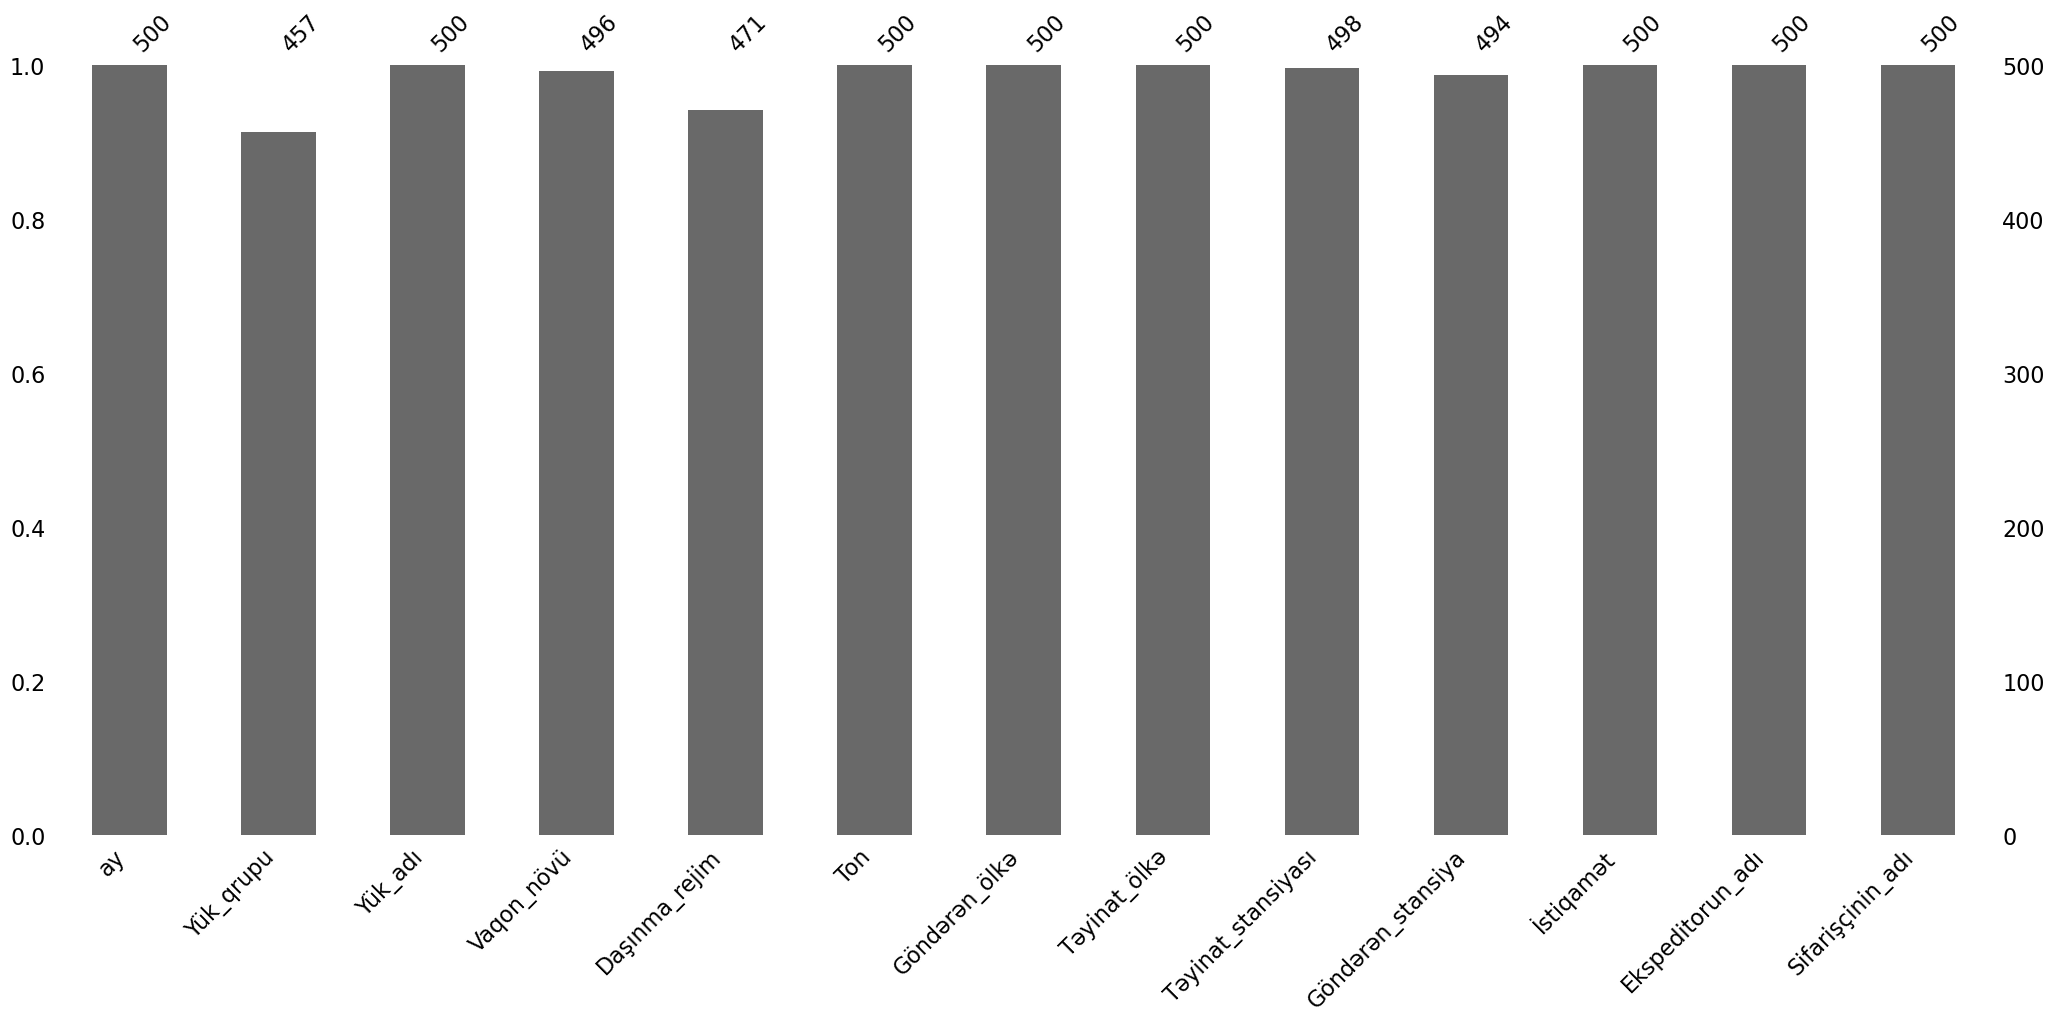

In [35]:
msno.bar(df)

In [36]:
#wrote a code to fill values of a variable based on the values of other variable
def fill_missing_with_mode(group):
    mode_value = group.mode().values[0]
    group.fillna(mode_value, inplace=True)
    return group
#as sending stations were the same countries, I changed stadion names based on the country names 
df["Göndərən_stansiya"] = df.groupby("Göndərən_ölkə")["Göndərən_stansiya"].apply(fill_missing_with_mode)
#as recieving stations were the same countries, I changed stadion names based on the country names 
df["Təyinat_stansiyası"] = df.groupby("Təyinat_ölkə")["Təyinat_stansiyası"].apply(fill_missing_with_mode)
#I filled "vaqon novu" categorical variable with mode
df["Vaqon_növü"].fillna(df["Vaqon_növü"].mode().values[0], inplace=True)
#I changed "dasinma rejimi" variable based on the "gonderen olke" and "teyinat olke" varibales
df.loc[(df["Göndərən_ölkə"] == "Azərbaycan") & (df["Təyinat_ölkə"] == "Azərbaycan"), "Daşınma_rejim"] = "Daxili"
df.loc[(df["Göndərən_ölkə"] != "Azərbaycan") & (df["Təyinat_ölkə"] == "Azərbaycan"), "Daşınma_rejim"] = "idxal"
df.loc[(df["Göndərən_ölkə"] != "Azərbaycan") & (df["Təyinat_ölkə"] != "Azərbaycan"), "Daşınma_rejim"] = "Tranzit"
df.loc[(df["Göndərən_ölkə"] == "Azərbaycan") & (df["Təyinat_ölkə"] != "Azərbaycan"), "Daşınma_rejim"] = "Ixrac"
# as "yuk adi" and "yuk qrupu" variables are highly asssociated, I filled "yuk qrupu" variable based on values in "yuk qrupu" variable
conditions1 = (df["Yük_adı"].isin(["Овощи свежие, к.п.о.", "Орехи грецкие свежие или сушеные, без скорлупы",
                                   "Лук-порей и луковичные овощи свежие", "Ананасы свежие или сушеные",
                                   "Фрукты, ягоды свежие, к.п.о."]))
df.loc[conditions1, "Yük_qrupu"] = "Təzə meyvə, giləmeyvə və tərəvəz. Fındıq"
conditions2 = (df["Yük_adı"] == "Горох сушеный")
df.loc[conditions2, "Yük_qrupu"] = "Taxıl və dənli bitkilər"
conditions3 = (df["Yük_adı"] == "Баранина свежая, края хребтовые спинной и почечной частей, необваленные")
df.loc[conditions3, "Yük_qrupu"] = "Qida sənayesi məhsulları"

In [37]:
df.isnull().sum()

ay                    0
Yük_qrupu             0
Yük_adı               0
Vaqon_növü            0
Daşınma_rejim         0
Ton                   0
Göndərən_ölkə         0
Təyinat_ölkə          0
Təyinat_stansiyası    0
Göndərən_stansiya     0
İstiqamət             0
Ekspeditorun_adı      0
Sifarişçinin_adı      0
dtype: int64

<AxesSubplot:>

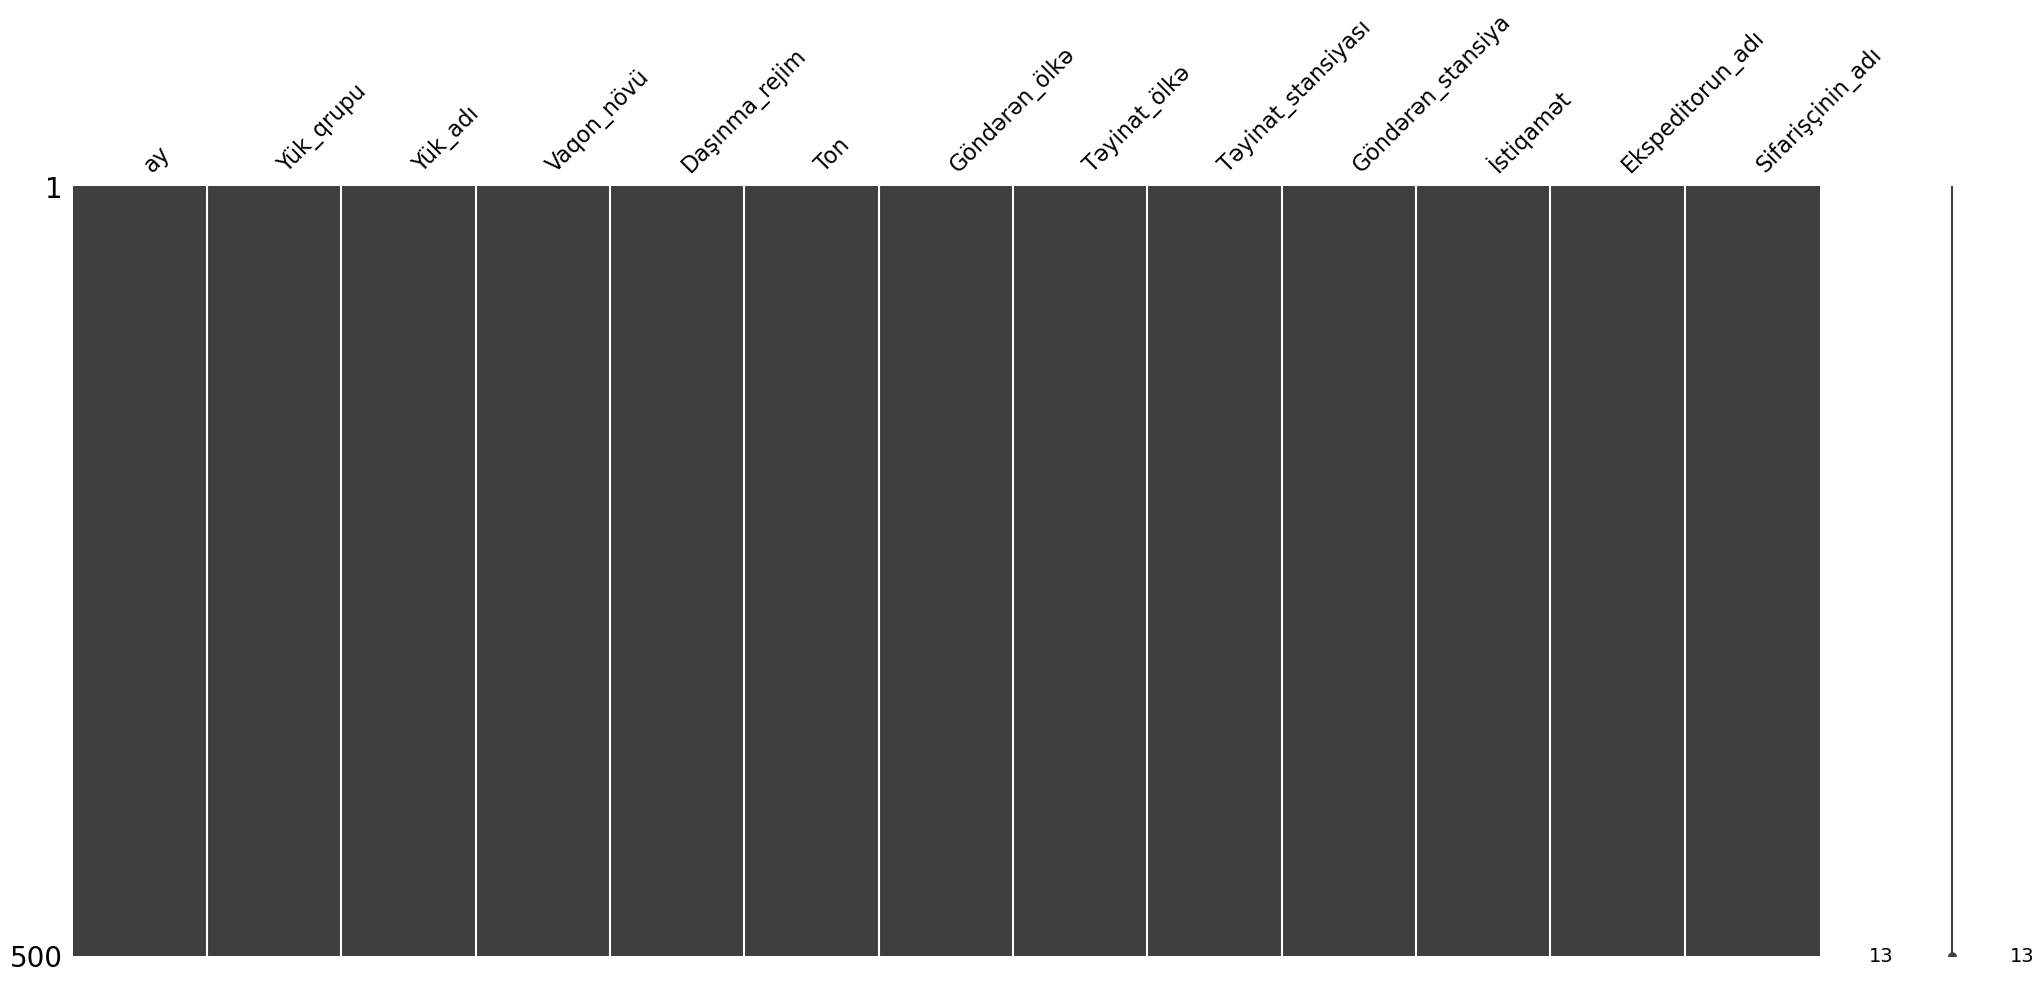

In [38]:
msno.matrix(df)

<AxesSubplot:>

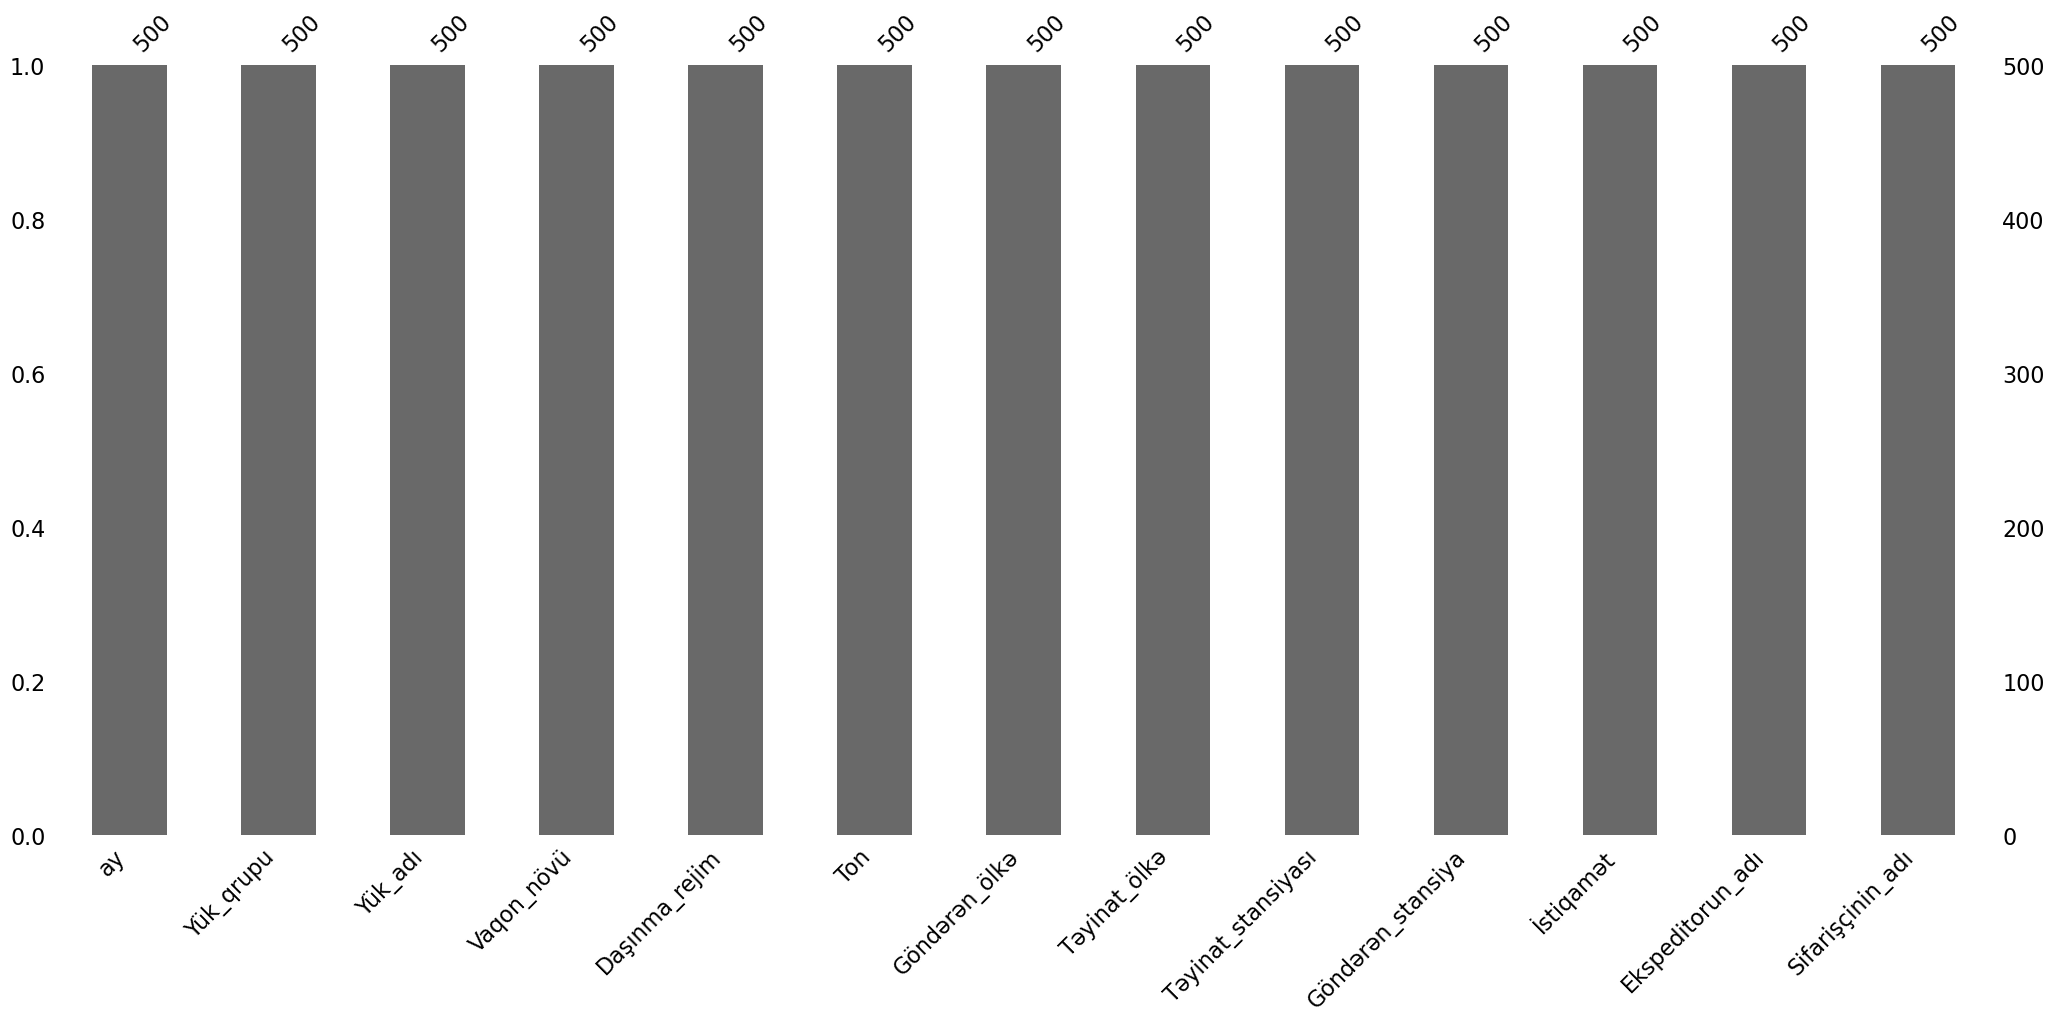

In [39]:
msno.bar(df)

**Data Cleaning Continued**

In [40]:
# as it is possible to have trains in the same day and on same direction (all the information are same)
#as well as I considered that data provided is not that much
#I did not drop dublicate values
df.duplicated().sum()

75

In [41]:
#exporting file to work the tasks in Tableau
df.to_excel("C:/Users/99470/Desktop/output_data.xlsx", index=False)

In [42]:
#encoding categorical variables
df=pd.concat([df, pd.get_dummies(df[["Yük_qrupu","Yük_adı","Vaqon_növü","Daşınma_rejim", "Göndərən_ölkə","Təyinat_ölkə","Təyinat_stansiyası","Göndərən_stansiya","İstiqamət","Ekspeditorun_adı","Sifarişçinin_adı"]],prefix="dummy",drop_first=True)], 1)
df.drop(["Yük_qrupu","Yük_adı","Vaqon_növü","Daşınma_rejim", "Göndərən_ölkə","Təyinat_ölkə","Təyinat_stansiyası","Göndərən_stansiya","İstiqamət","Ekspeditorun_adı","Sifarişçinin_adı"],axis=1,inplace=True) 

C:\Users\99470\AppData\Local\Temp\ipykernel_16660\2429890319.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pd.concat([df, pd.get_dummies(df[["Yük_qrupu","Yük_adı","Vaqon_növü","Daşınma_rejim", "Göndərən_ölkə","Təyinat_ölkə","Təyinat_stansiyası","Göndərən_stansiya","İstiqamət","Ekspeditorun_adı","Sifarişçinin_adı"]],prefix="dummy",drop_first=True)], 1)


In [43]:
df.head()

,ay,Ton,dummy_Qida sənayesi məhsulları,dummy_Taxıl və dənli bitkilər,"dummy_Təzə meyvə, giləmeyvə və tərəvəz. Fındıq",dummy_Ананасы свежие или сушеные,"dummy_Баранина свежая, края хребтовые спинной и почечной частей, необваленные",dummy_Вишня кислая свежая,dummy_Горох сушеный,"dummy_Грибы рода Agaricus сушеные, не обработанные","dummy_Картофель свежий, к.п.о.",dummy_Лук-порей и луковичные овощи свежие,"dummy_Молоко, сливки несгущенные без сахара, жир от 45%, упаковка до 2 л","dummy_Овощи свежие, к.п.о.","dummy_Орехи грецкие свежие или сушеные, без скорлупы","dummy_Фрукты, ягоды свежие, к.п.о.",dummy_Konteyner,dummy_Platforma,dummy_Qapalı,dummy_Yarımvaqon,dummy_Çən,dummy_İzotermik,dummy_Ixrac,dummy_Tranzit,dummy_idxal,dummy_Azərbaycan,dummy_Belarus,dummy_Bolqarıstan,dummy_Braziliya,dummy_Cənubi Koreya,dummy_Gürcüstan,dummy_Kanada,dummy_Latviya,dummy_Litva,dummy_Niderland,dummy_Polşa,dummy_Qazaxıstan,dummy_Qırğızıstan,dummy_Rusiya,dummy_Tailand,dummy_Türkiyə,dummy_Ukrayna,dummy_Çin,dummy_Özbəkistan,dummy_Ərəb Əmirliyi,dummy_№3-cü ölkələr,dummy_Gürcüstan,dummy_Qazaxıstan,dummy_Rusiya,dummy_Tacikistan,dummy_Türkmənistan,dummy_Özbəkistan,dummy_Əfqanistan,dummy_№3-cü ölkələr,dummy_БАЛАДЖАРЫ,dummy_БЕЮК-КЯСИК-ЭКСПОРТ,dummy_ГАДЖИ ЗЕЙНАЛАБДИН,dummy_КИШЛЫ,dummy_МАСАЛЛЫ,dummy_МАШТАГИ,dummy_ПИРШАГИ,dummy_СУМГАИТ,dummy_ХАЧМАС,dummy_ХЫРДАЛАН,dummy_ЭЙБАТ,dummy_ЯЛАМА,dummy_БЕЮК-КЯСИК-ЭКСПОРТ,dummy_КАЗИ-МАГОМЕД,dummy_КИШЛЫ,dummy_МУГАН,dummy_СУМГАИТ,dummy_ЯЛАМА,dummy_Qərb,dummy_Şimal,"dummy_""AZTRANSOIL"" MMC","dummy_""TRANS KAFKAZ TRANSPORT"" MMC",dummy_24 N-li RELS QAYNAQLAMA QATARI,dummy_Aztranoil MMC,dummy_Marketinq və iqtisadi əməliyyatlar idarəsi,"dummy_""AZ TRANS RAIL"" MƏHDUD MƏSULIYYƏTLI CƏMIYYƏTI","dummy_""AZƏRBAYCAN ŞƏKƏR ISTEHSALAT BIRLIYI"" MMC","dummy_""AZƏRNEFTYAĞ"" NEFT EMALI ZAVODU","dummy_""EURO-ASIAN OIL COMPANY INC.""","dummy_""TRANS KAFKAZ TRANSPORT"" MMC",dummy_Marketinq və iqtisadi əməliyyatlar idarəsi,dummy_ORBITA MMC
0,1,490,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
1,2,410,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,3,30,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,4,80,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,5,530,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [44]:
y = df[["Ton"]]
X = df.drop("Ton",axis=1)

In [45]:
#bypass outliers detection, as there is no numerical independent variable except for "ay" variable which does not have outlier
#bypass multicollinearity problem checking, as there only one numerical independent variable

In [46]:
#scaling numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_cols = X.columns
X_index = X.index
X = scaler.fit_transform(X)
X = pd.DataFrame(data=X,columns=X_cols,index=X_index)
X.head()

,ay,dummy_Qida sənayesi məhsulları,dummy_Taxıl və dənli bitkilər,"dummy_Təzə meyvə, giləmeyvə və tərəvəz. Fındıq",dummy_Ананасы свежие или сушеные,"dummy_Баранина свежая, края хребтовые спинной и почечной частей, необваленные",dummy_Вишня кислая свежая,dummy_Горох сушеный,"dummy_Грибы рода Agaricus сушеные, не обработанные","dummy_Картофель свежий, к.п.о.",dummy_Лук-порей и луковичные овощи свежие,"dummy_Молоко, сливки несгущенные без сахара, жир от 45%, упаковка до 2 л","dummy_Овощи свежие, к.п.о.","dummy_Орехи грецкие свежие или сушеные, без скорлупы","dummy_Фрукты, ягоды свежие, к.п.о.",dummy_Konteyner,dummy_Platforma,dummy_Qapalı,dummy_Yarımvaqon,dummy_Çən,dummy_İzotermik,dummy_Ixrac,dummy_Tranzit,dummy_idxal,dummy_Azərbaycan,dummy_Belarus,dummy_Bolqarıstan,dummy_Braziliya,dummy_Cənubi Koreya,dummy_Gürcüstan,dummy_Kanada,dummy_Latviya,dummy_Litva,dummy_Niderland,dummy_Polşa,dummy_Qazaxıstan,dummy_Qırğızıstan,dummy_Rusiya,dummy_Tailand,dummy_Türkiyə,dummy_Ukrayna,dummy_Çin,dummy_Özbəkistan,dummy_Ərəb Əmirliyi,dummy_№3-cü ölkələr,dummy_Gürcüstan,dummy_Qazaxıstan,dummy_Rusiya,dummy_Tacikistan,dummy_Türkmənistan,dummy_Özbəkistan,dummy_Əfqanistan,dummy_№3-cü ölkələr,dummy_БАЛАДЖАРЫ,dummy_БЕЮК-КЯСИК-ЭКСПОРТ,dummy_ГАДЖИ ЗЕЙНАЛАБДИН,dummy_КИШЛЫ,dummy_МАСАЛЛЫ,dummy_МАШТАГИ,dummy_ПИРШАГИ,dummy_СУМГАИТ,dummy_ХАЧМАС,dummy_ХЫРДАЛАН,dummy_ЭЙБАТ,dummy_ЯЛАМА,dummy_БЕЮК-КЯСИК-ЭКСПОРТ,dummy_КАЗИ-МАГОМЕД,dummy_КИШЛЫ,dummy_МУГАН,dummy_СУМГАИТ,dummy_ЯЛАМА,dummy_Qərb,dummy_Şimal,"dummy_""AZTRANSOIL"" MMC","dummy_""TRANS KAFKAZ TRANSPORT"" MMC",dummy_24 N-li RELS QAYNAQLAMA QATARI,dummy_Aztranoil MMC,dummy_Marketinq və iqtisadi əməliyyatlar idarəsi,"dummy_""AZ TRANS RAIL"" MƏHDUD MƏSULIYYƏTLI CƏMIYYƏTI","dummy_""AZƏRBAYCAN ŞƏKƏR ISTEHSALAT BIRLIYI"" MMC","dummy_""AZƏRNEFTYAĞ"" NEFT EMALI ZAVODU","dummy_""EURO-ASIAN OIL COMPANY INC.""","dummy_""TRANS KAFKAZ TRANSPORT"" MMC",dummy_Marketinq və iqtisadi əməliyyatlar idarəsi,dummy_ORBITA MMC
0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.181818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.272727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.363636,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Modelling**

In [47]:
#train test spliting
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=1,
                                                     shuffle=True
                                                    )


In [48]:
#choosing model
from sklearn.ensemble import GradientBoostingRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
gbm = GradientBoostingRegressor(random_state = 123)

In [49]:
#writing values for BayesSearchCV to seach and find best hyperparameter
search_spaces = {
    'n_estimators': Integer(50, 500),                   
    'learning_rate': Real(0.001, 0.1, prior='log-uniform'),
    'max_depth': Integer(1, 10),                        
    'min_samples_split': Integer(2, 50),               
    'min_samples_leaf': Integer(1, 50),             
    'subsample': Real(0.1, 1.0, prior='uniform'),       
}

In [50]:
gbm_bayes = BayesSearchCV(
    estimator=gbm,
    search_spaces=search_spaces,
    scoring='r2',
    n_iter=10,
    random_state=123,
    return_train_score=True,
    refit=False,
)

In [51]:
#training model
gbm_bayes_fit = gbm_bayes.fit(X_train, y_train)

C:\Users\99470\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\99470\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\99470\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\99470\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was e

C:\Users\99470\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\99470\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\99470\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\99470\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [52]:
cv_results_gbm_bayes = pd.DataFrame.from_dict(gbm_bayes_fit.cv_results_)

In [53]:
gbm_bayes_top_rank = cv_results_gbm_bayes[cv_results_gbm_bayes['rank_test_score'] == 1]

In [54]:
print('The best Parameters are: ')
print(gbm_bayes_fit.best_params_)

The best Parameters are: 
OrderedDict([('learning_rate', 0.03435897906294479), ('max_depth', 3), ('min_samples_leaf', 3), ('min_samples_split', 37), ('n_estimators', 475), ('subsample', 0.8388382819211124)])


In [55]:
params_best = {
    'n_estimators': 475,                   
    'learning_rate': 0.03435897906294479,
    'max_depth': 3,                        
    'min_samples_split': 37,               
    'min_samples_leaf': 3,             
    'subsample': 0.8388382819211124,  
}
gbm_best = GradientBoostingRegressor(**params_best)

In [56]:
#fitting model again with best hyperparameters
gbm_best.fit(X_train, y_train)

C:\Users\99470\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.03435897906294479, min_samples_leaf=3,
                          min_samples_split=37, n_estimators=475,
                          subsample=0.8388382819211124)

In [57]:
#getting results
y_pred = gbm_best.predict(X_test)
y_pred_train = gbm_best.predict(X_train)

In [58]:
pd.DataFrame( {'Predicions':y_pred.reshape(1,-1)[0],'Actual Numbers':y_test.values.reshape(1,-1)[0]})

,Predicions,Actual Numbers
0,396.283857,430
1,405.866696,420
2,215.950993,200
3,123.411221,130
4,186.841363,110
...,...,...
95,546.688386,600
96,674.218486,660
97,615.691628,600
98,447.023402,680


In [59]:
#evaluation of model - comparision of train and test results
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print("Train Results")
print("MAE:",round(mean_absolute_error(y_train,y_pred_train),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
print("R**2:",round(r2_score(y_train,y_pred_train),2))
print("_______________________________________________")
print("Test Results")
print("MAE:",round(mean_absolute_error(y_test,y_pred),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
print("R**2:",round(r2_score(y_test,y_pred),2))

Train Results
MAE: 37.23
RMSE: 64.54
R**2: 0.87
_______________________________________________
Test Results
MAE: 41.84
RMSE: 91.01
R**2: 0.65


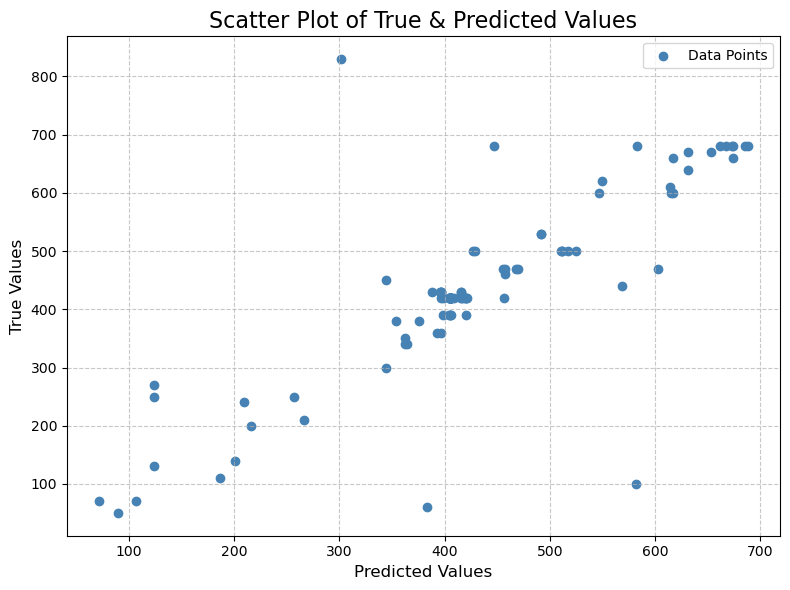

In [60]:
#using scatter plot for comparing true & predicted values
plt.figure(figsize=(8, 6))
plt.title('Scatter Plot of True & Predicted Values', fontsize=16)
plt.scatter(y_pred, y_test, color='steelblue', marker='o', label='Data Points')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.margins(0.05)
plt.tight_layout()
plt.legend()
plt.show()

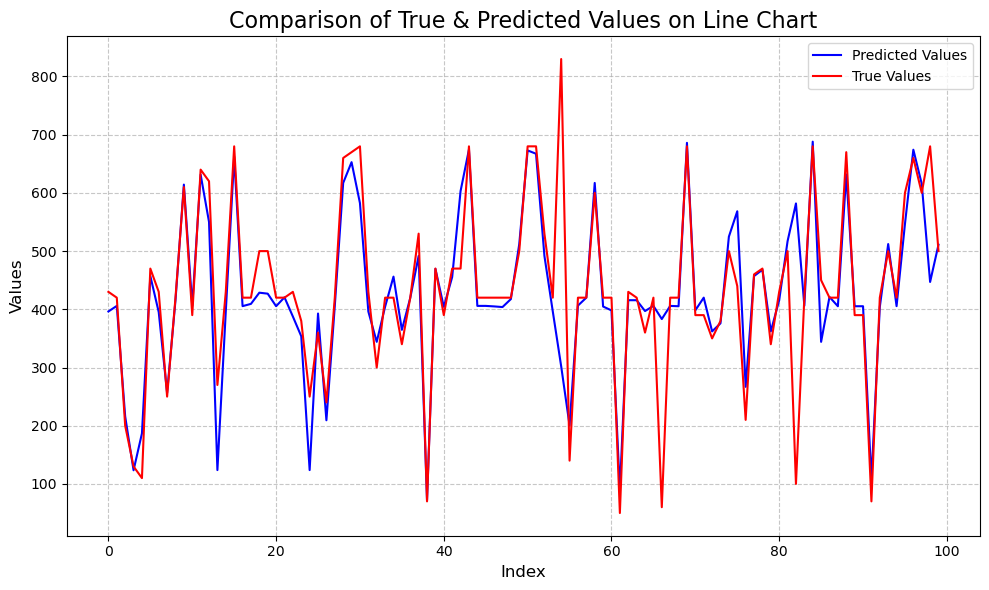

In [61]:
#using line chart to compare true & predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_pred.reshape(1,-1)[0], color='blue', label='Predicted Values')
plt.plot(y_test.values.reshape(1,-1)[0], color='red', label='True Values')
plt.title('Comparison of True & Predicted Values on Line Chart', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()